In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id='+'https://drive.google.com/file/d/1QcKzIJlO6WRUH4IkrKAvDmBVEipXkeQb/view?usp=sharing'.split('/')[-2])              

In [3]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5


In [4]:
data.shape


(1243241, 7)

In [5]:
data.describe()

,VendorID,passenger_count,PULocationID,DOLocationID,fare_amount
count,1.227632e+06,1.227632e+06,1.243241e+06,1.243241e+06,1.243241e+06
mean,1.676771e+00,1.568692e+00,1.627453e+02,1.607467e+02,1.302977e+01
std,4.677094e-01,1.181809e+00,6.610786e+01,7.098176e+01,1.293962e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03
25%,1.000000e+00,1.000000e+00,1.250000e+02,1.070000e+02,6.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+02,1.620000e+02,9.000000e+00
75%,2.000000e+00,2.000000e+00,2.330000e+02,2.330000e+02,1.400000e+01
max,2.000000e+00,9.000000e+00,2.650000e+02,2.650000e+02,1.238000e+03


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1227632 non-null  float64
 1   tpep_pickup_datetime   1243241 non-null  object 
 2   tpep_dropoff_datetime  1243241 non-null  object 
 3   passenger_count        1227632 non-null  float64
 4   PULocationID           1243241 non-null  int64  
 5   DOLocationID           1243241 non-null  int64  
 6   fare_amount            1243241 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 66.4+ MB


In [7]:
data['tpep_pickup_datetime'].head()
data['tpep_pickup_datetime'].value_counts()

2020-01-06 08:13:00    20
2020-01-07 14:30:00    17
2020-01-06 13:59:00    17
2020-01-07 12:52:00    16
2020-01-06 07:32:00    16
                       ..
2020-01-02 16:05:49     1
2020-01-06 06:02:41     1
2020-01-01 10:19:01     1
2020-01-01 06:41:56     1
2020-01-07 05:40:11     1
Name: tpep_pickup_datetime, Length: 465021, dtype: int64

In [8]:
data['PULocationID'].head()
data['PULocationID'].value_counts()

132    53790
237    52055
161    49558
236    48450
186    44809
       ...  
206        1
245        1
111        1
30         1
2          1
Name: PULocationID, Length: 255, dtype: int64

In [9]:
data['DOLocationID'].head()
data['DOLocationID'].value_counts()

236    52377
237    46683
161    44751
230    39926
170    36256
       ...  
187        7
204        7
99         3
2          3
104        1
Name: DOLocationID, Length: 261, dtype: int64

In [10]:
data.tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
data.tpep_pickup_datetime = pd.DatetimeIndex(data.tpep_pickup_datetime)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243241 entries, 0 to 1243240
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1227632 non-null  float64       
 1   tpep_pickup_datetime   1243241 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1243241 non-null  object        
 3   passenger_count        1227632 non-null  float64       
 4   PULocationID           1243241 non-null  int64         
 5   DOLocationID           1243241 non-null  int64         
 6   fare_amount            1243241 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 66.4+ MB


In [13]:
data['weekday'] = data.tpep_pickup_datetime.dt.day_name()

In [14]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday


In [15]:
data['day'] = data.tpep_pickup_datetime.dt.day

In [16]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,fare_amount,weekday,day
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,238,239,6.0,Wednesday,1
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,239,238,7.0,Wednesday,1
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,238,238,6.0,Wednesday,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,238,151,5.5,Wednesday,1
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,193,193,3.5,Wednesday,1


In [17]:
data['weekday'].head()
data['weekday'].value_counts()

Tuesday      201520
Friday       183477
Saturday     182752
Monday       179515
Wednesday    169437
Sunday       164399
Thursday     162141
Name: weekday, dtype: int64

In [18]:
data['passenger_count'].value_counts()

1.0    847452
2.0    200439
3.0     56019
5.0     45092
4.0     31127
6.0     26542
0.0     20939
7.0        11
8.0         6
9.0         5
Name: passenger_count, dtype: int64

In [19]:
data.describe()

,VendorID,passenger_count,PULocationID,DOLocationID,fare_amount,day
count,1.227632e+06,1.227632e+06,1.243241e+06,1.243241e+06,1.243241e+06,1.243241e+06
mean,1.676771e+00,1.568692e+00,1.627453e+02,1.607467e+02,1.302977e+01,4.090022e+00
std,4.677094e-01,1.181809e+00,6.610786e+01,7.098176e+01,1.293962e+01,2.014042e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.250000e+02,1.070000e+02,6.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+02,1.620000e+02,9.000000e+00,4.000000e+00
75%,2.000000e+00,2.000000e+00,2.330000e+02,2.330000e+02,1.400000e+01,6.000000e+00
max,2.000000e+00,9.000000e+00,2.650000e+02,2.650000e+02,1.238000e+03,7.000000e+00


In [20]:
data.groupby(['weekday'])

In [21]:
weekday_grp = data.groupby(['weekday'])

In [22]:
weekday_grp['tpep_pickup_datetime'].value_counts()

weekday    tpep_pickup_datetime
Friday     2020-01-03 15:22:00     13
           2020-01-03 08:55:00     12
           2020-01-03 11:03:56     12
           2020-01-03 17:16:14     12
           2020-01-03 11:23:58     11
                                   ..
Wednesday  2020-01-01 23:59:48      1
           2020-01-01 23:59:51      1
           2020-01-01 23:59:52      1
           2020-01-01 23:59:56      1
           2020-01-01 23:59:57      1
Name: tpep_pickup_datetime, Length: 465021, dtype: int64

In [23]:
weekday_grp['tpep_dropoff_datetime'].value_counts()

weekday    tpep_dropoff_datetime
Friday     2020-01-04 00:00:00      54
           2020-01-03 19:09:29      15
           2020-01-03 15:42:01      13
           2020-01-03 14:36:00      12
           2020-01-03 18:01:00      12
                                    ..
Wednesday  2020-01-02 23:08:14       1
           2020-01-02 23:08:38       1
           2020-01-02 23:31:21       1
           2020-01-02 23:39:12       1
           2020-01-02 23:44:54       1
Name: tpep_dropoff_datetime, Length: 469954, dtype: int64

In [24]:
weekday_grp['day'].value_counts()

weekday    day
Friday     3      183477
Monday     6      179515
Saturday   4      182752
Sunday     5      164399
Thursday   2      162141
Tuesday    7      201520
Wednesday  1      169437
Name: day, dtype: int64

In [25]:
data.groupby(['tpep_dropoff_datetime'])

In [26]:
tpep_dropoff_datetime_grp = data.groupby(['weekday'])

In [27]:
tpep_dropoff_datetime_grp['weekday'].value_counts()

weekday    weekday  
Friday     Friday       183477
Monday     Monday       179515
Saturday   Saturday     182752
Sunday     Sunday       164399
Thursday   Thursday     162141
Tuesday    Tuesday      201520
Wednesday  Wednesday    169437
Name: weekday, dtype: int64

In [28]:
data.groupby(['tpep_pickup_datetime'])

In [29]:
tpep_pickup_datetime_grp = data.groupby(['weekday'])

In [30]:
tpep_pickup_datetime_grp['weekday'].value_counts()

weekday    weekday  
Friday     Friday       183477
Monday     Monday       179515
Saturday   Saturday     182752
Sunday     Sunday       164399
Thursday   Thursday     162141
Tuesday    Tuesday      201520
Wednesday  Wednesday    169437
Name: weekday, dtype: int64

In [31]:
data['weekday'].value_counts()

Tuesday      201520
Friday       183477
Saturday     182752
Monday       179515
Wednesday    169437
Sunday       164399
Thursday     162141
Name: weekday, dtype: int64

In [32]:
tpep_dropoff_datetime_grp['DOLocationID'].value_counts()

weekday    DOLocationID
Friday     161             7755
           236             7586
           237             7047
           230             6593
           170             5706
                           ... 
Wednesday  44                 1
           96                 1
           99                 1
           104                1
           187                1
Name: DOLocationID, Length: 1787, dtype: int64

In [33]:
tpep_pickup_datetime_grp['PULocationID'].value_counts()

weekday    PULocationID
Friday     237             7915
           161             7884
           132             7333
           236             7208
           186             6784
                           ... 
Wednesday  156                1
           175                1
           187                1
           206                1
           253                1
Name: PULocationID, Length: 1652, dtype: int64

In [34]:
# Add new dataset

data['new_df'] = data['VendorID'] + data['fare_amount'] + data['passenger_count']


In [35]:
data.shape

(1243241, 10)

In [37]:
data['VendorID']

0          1.0
1          1.0
2          1.0
3          1.0
4          2.0
          ... 
1243236    NaN
1243237    NaN
1243238    NaN
1243239    NaN
1243240    NaN
Name: VendorID, Length: 1243241, dtype: float64

In [38]:
new_df = data[['VendorID','fare_amount','passenger_count']]

In [39]:
new_df

,VendorID,fare_amount,passenger_count
0,1.0,6.00,1.0
1,1.0,7.00,1.0
2,1.0,6.00,1.0
3,1.0,5.50,1.0
4,2.0,3.50,1.0
...,...,...,...
1243236,NaN,28.36,NaN
1243237,NaN,24.36,NaN
1243238,NaN,24.36,NaN
1243239,NaN,20.06,NaN


In [40]:
new_df.shape

(1243241, 3)

In [41]:
new_df.describe()

,VendorID,fare_amount,passenger_count
count,1.227632e+06,1.243241e+06,1.227632e+06
mean,1.676771e+00,1.302977e+01,1.568692e+00
std,4.677094e-01,1.293962e+01,1.181809e+00
min,1.000000e+00,-1.238000e+03,0.000000e+00
25%,1.000000e+00,6.000000e+00,1.000000e+00
50%,2.000000e+00,9.000000e+00,1.000000e+00
75%,2.000000e+00,1.400000e+01,2.000000e+00
max,2.000000e+00,1.238000e+03,9.000000e+00


In [42]:
new_df['fare_amount'].describe()


count    1.243241e+06
mean     1.302977e+01
std      1.293962e+01
min     -1.238000e+03
25%      6.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.238000e+03
Name: fare_amount, dtype: float64

In [43]:
new_df

,VendorID,fare_amount,passenger_count
0,1.0,6.00,1.0
1,1.0,7.00,1.0
2,1.0,6.00,1.0
3,1.0,5.50,1.0
4,2.0,3.50,1.0
...,...,...,...
1243236,NaN,28.36,NaN
1243237,NaN,24.36,NaN
1243238,NaN,24.36,NaN
1243239,NaN,20.06,NaN


In [44]:
new_df.fillna(value=0)

,VendorID,fare_amount,passenger_count
0,1.0,6.00,1.0
1,1.0,7.00,1.0
2,1.0,6.00,1.0
3,1.0,5.50,1.0
4,2.0,3.50,1.0
...,...,...,...
1243236,0.0,28.36,0.0
1243237,0.0,24.36,0.0
1243238,0.0,24.36,0.0
1243239,0.0,20.06,0.0


In [45]:
new_df['fare_amount'].describe()

count    1.243241e+06
mean     1.302977e+01
std      1.293962e+01
min     -1.238000e+03
25%      6.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.238000e+03
Name: fare_amount, dtype: float64

In [46]:
new_df.fillna(value=new_df['fare_amount'].max())

,VendorID,fare_amount,passenger_count
0,1.0,6.00,1.0
1,1.0,7.00,1.0
2,1.0,6.00,1.0
3,1.0,5.50,1.0
4,2.0,3.50,1.0
...,...,...,...
1243236,1238.0,28.36,1238.0
1243237,1238.0,24.36,1238.0
1243238,1238.0,24.36,1238.0
1243239,1238.0,20.06,1238.0


In [47]:
new_df['fare_amount'].describe()

count    1.243241e+06
mean     1.302977e+01
std      1.293962e+01
min     -1.238000e+03
25%      6.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.238000e+03
Name: fare_amount, dtype: float64

In [48]:
new_df['passenger_count'].value_counts()

1.0    847452
2.0    200439
3.0     56019
5.0     45092
4.0     31127
6.0     26542
0.0     20939
7.0        11
8.0         6
9.0         5
Name: passenger_count, dtype: int64

In [49]:
#pandasgui
from pandasgui import show
gui = show(data)

In [51]:
import pandas as pd

In [52]:
exam_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/exam_scores.csv")

In [53]:
exam_data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71
5,female,group D,associate's degree,standard,completed,75,82,85
6,female,group B,associate's degree,free/reduced,none,69,78,80
7,male,group E,some high school,free/reduced,none,54,50,48
8,male,group C,some high school,standard,completed,65,58,55
9,male,group B,master's degree,standard,none,87,75,79


In [54]:
exam_data.describe()

,math score,reading score,writing score
count,1000.000000,1000.00000,1000.000000
mean,67.128000,70.17400,68.973000
std,14.815367,14.85599,15.109155
min,15.000000,18.00000,10.000000
25%,58.000000,60.00000,59.000000
50%,67.000000,70.00000,69.000000
75%,78.000000,81.00000,80.000000
max,100.000000,100.00000,100.000000


In [55]:
exam_data['race/ethnicity'].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: race/ethnicity, dtype: int64

In [56]:
exam_data['parental level of education'].value_counts()

some college          226
associate's degree    197
high school           190
some high school      181
bachelor's degree     130
master's degree        76
Name: parental level of education, dtype: int64

In [57]:
exam_data['reading score'].value_counts().max()

32

In [58]:
exam_data['writing score'].value_counts().max()

32

In [59]:
exam_data['gender'].value_counts()

female    502
male      498
Name: gender, dtype: int64

In [60]:
exam_data['math score'].value_counts().max()

35

In [61]:
exam_data['test preparation course'].value_counts()

none         654
completed    346
Name: test preparation course, dtype: int64

In [62]:
exam_data['test preparation course'].value_counts().max()

654

In [63]:
group_a = exam_data[['race/ethnicity']]

In [64]:
group_a.head()

,race/ethnicity
0,group B
1,group C
2,group C
3,group D
4,group D


In [65]:
group_a['race/ethnicity'].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: race/ethnicity, dtype: int64

In [66]:
group_a.groupby('race/ethnicity')

In [67]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [68]:
exam_data.groupby(['race/ethnicity'])

In [69]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [70]:
exam_data.groupby(['race/ethnicity'])

In [71]:
exam_data.groupby(['test preparation course'])

In [72]:
test preparation course_grp = exam_data.groupby(['test preparation course'])

SyntaxError: invalid syntax (<ipython-input-72-69e327083921>, line 1)

exam_data.columns

In [74]:
# rename method
exam_data.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)

In [75]:
exam_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,bachelor's degree,standard,none,74,68,67
1,female,group C,some college,standard,completed,58,68,66
2,male,group C,some college,free/reduced,none,66,65,65
3,female,group D,bachelor's degree,free/reduced,none,74,75,73
4,male,group D,some college,standard,none,78,77,71


In [76]:
exam_data.groupby(['ethnicity'])

In [77]:
ethnicity_grp = exam_data.groupby(['ethnicity'])

In [85]:
ethnicity_grp.get_group('group A')

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
19,female,group A,some high school,free/reduced,none,58,80,68
80,male,group A,some high school,free/reduced,none,72,74,69
98,male,group A,some high school,standard,none,45,48,35
109,male,group A,bachelor's degree,free/reduced,none,47,55,53
128,male,group A,associate's degree,standard,completed,100,97,94
...,...,...,...,...,...,...,...,...
908,female,group A,master's degree,standard,none,78,99,93
946,female,group A,master's degree,free/reduced,completed,44,53,55
989,male,group A,some college,standard,none,74,65,67
992,male,group A,bachelor's degree,standard,none,78,73,71


In [102]:
exam_data[['ethnicity','test preparation course']].head()

,ethnicity,test preparation course
0,group B,none
1,group C,completed
2,group C,none
3,group D,none
4,group D,none


In [100]:
exam_data['ethnicity'].value_counts()

group C    294
group D    280
group B    211
group E    152
group A     63
Name: ethnicity, dtype: int64

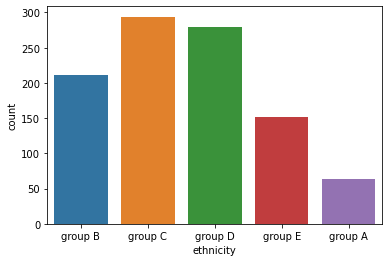

In [93]:
sns.countplot(data = exam_data, x ='ethnicity');

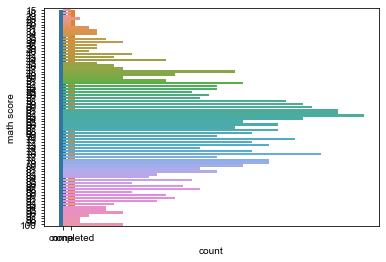

In [98]:
sns.countplot(data = exam_data, x ='test preparation course');
sns.countplot(data = exam_data, y ='math score');
sns.set(rc={'figure.figsize':(12,10)})

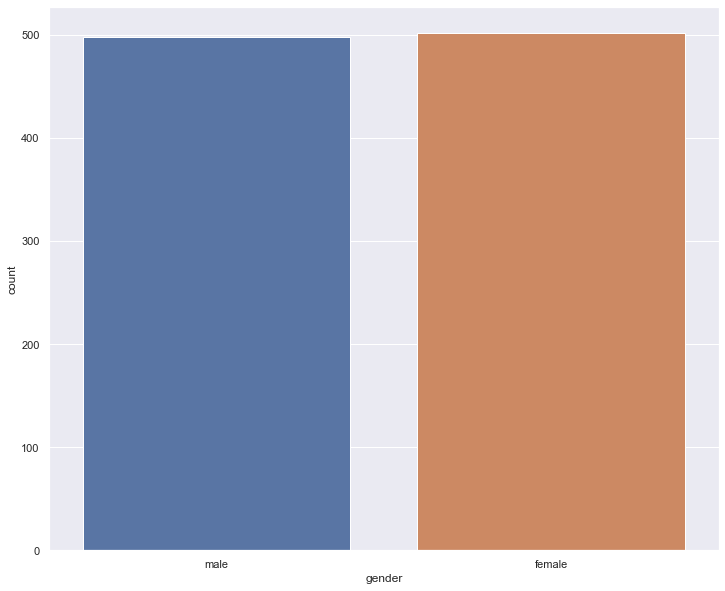

In [99]:
sns.countplot(data = exam_data, x ='gender');

In [104]:
exam_data['test preparation course'].value_counts()

none         654
completed    346
Name: test preparation course, dtype: int64